In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import requests
import geojson



In [2]:
GPS = np.genfromtxt('GPS_vectors_after_rotation_NNR.dat.txt',skip_header=2,usecols=(0,1,2,3),names=['Lon','Lat','dx','dy'])

In [3]:
minlon=80
maxlon=120
minlat=10
maxlat=50

inpoly = np.where((GPS['Lon'] >= minlon) & (GPS['Lon'] <= maxlon) & (GPS['Lat'] >= minlat) & (GPS['Lat'] <= maxlat))
GPS=GPS[inpoly]

GPS['dx']=GPS['dx']-np.mean(GPS['dx'])
GPS['dy']=GPS['dy']-np.mean(GPS['dy'])


In [39]:
parameters={
    "starttime":"1900-01-01",
    "minmagnitude":4,
    "minlatitude":minlat,
    "maxlatitude":maxlat,
    "minlongitude":minlon,
    "maxlongitude":maxlon,
    "limit":5000,
    "format":"geojson"
}
response=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query",params=parameters)
output=response.json()
numquakes = len(output['features'])
print(numquakes)

5000


In [40]:
lon=np.empty(numquakes,)
lat=np.empty(numquakes,)
z=np.empty(numquakes,)
mag=np.empty(numquakes,)
for i in range(numquakes):
    lon[i] = output['features'][i]['geometry']['coordinates'][0]
    lat[i] = output['features'][i]['geometry']['coordinates'][1]
    z[i]   = output['features'][i]['geometry']['coordinates'][2]   
    mag[i] = output['features'][i]['properties']['mag']
    

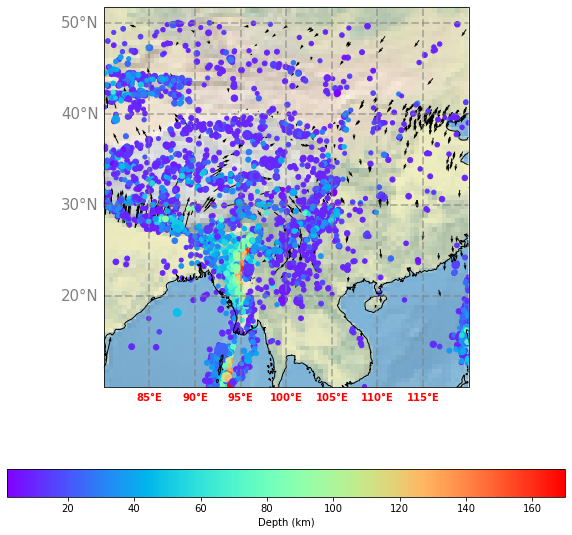

In [41]:
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minlon,maxlon,minlat,maxlat])
ax.coastlines()
ax.quiver(GPS['Lon'],GPS['Lat'],GPS['dx'],GPS['dy'])
ax.stock_img()

im=ax.scatter(lon,lat,s=np.power(2,mag),c=z,cmap='rainbow')

gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
fig.colorbar(im,ax=ax,label='Depth (km)',orientation='horizontal')
plt.show()
